# **The algorithms used are:**

* Bagging Classification
* Random Forest Classification
* Extra Tree Classification
* Naive Bayes classification
* Decision tree Classification
* KNeighbors Classification
* SVM Classification

#Header Files

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import re

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Reading and observing the data

In [ ]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
SF = df.loc[(df.type == 'spam')]
SF.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


In [ ]:
df.describe()

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['length']=df['text'].apply(len)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.length.describe()

count    5572.000000
mean       80.119167
std        59.691288
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

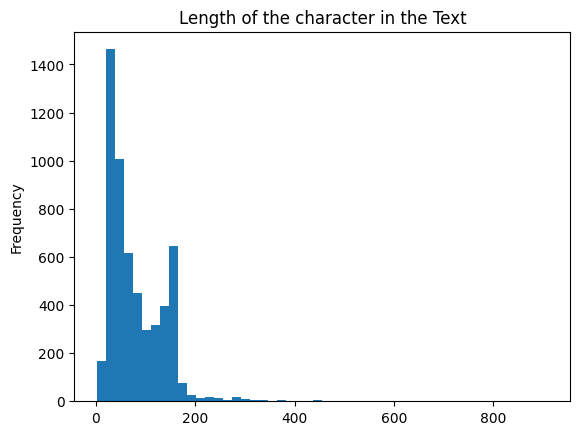

In [ ]:
df['length'].plot(bins=50,kind='hist').set_title("Length of the character in the Text")
plt.savefig('Length of the character in the Text.png')

In [ ]:
df[df['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Text Pre-processing

In [ ]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [ ]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()

['sample', 'message']

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

#Tokenization

In [ ]:
df['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

11304


In [ ]:
textat4=df['text'][3]
print(textat4)

U dun say so early hor... U c already then say...


In [ ]:
bow4=bow_transformer.transform([textat4])
print(bow4)
print(bow4.shape)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


In [ ]:
print(bow_transformer.get_feature_names_out()[4073])
print(bow_transformer.get_feature_names_out()[9570])

VALUED
shades


In [ ]:
text_bow = bow_transformer.transform(df['text'])

In [ ]:
print('Shape of Sparse Matrix: ',text_bow.shape)
print('Amount of non-zero occurences:',text_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of non-zero occurences: 50193


In [ ]:
sparsity =(100.0 * text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']])

4.773658523649919
5.775541185859478


In [ ]:
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(5572, 11304)


In [ ]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',df.type[3])

expected: ham


In [ ]:
all_predictions = spam_detect_model.predict(text_tfidf)
print(all_predictions)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df['type'],all_predictions))
print(confusion_matrix(df['type'],all_predictions))
print ("accuracy_score : ", accuracy_score(type_test, predictions))

In [ ]:
from sklearn.model_selection import train_test_split
text_train,text_test,type_train,type_test = train_test_split(df['text'],df['type'],test_size=0.2)

In [ ]:
print(len(text_train),len(text_test),len(type_train),len(type_test))

4457 1115 4457 1115


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [ ]:
pipeline.fit(text_train,type_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f92b757c430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#Testing and Training Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [ ]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [ ]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42787 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 18639 stored elements in Compressed Sparse Row format>

In [ ]:
dict={}
precision={}
recall={}

#Naive Bayes Classification

In [ ]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)
y_mnb

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))
tn, fp, fn, tp = confusion_matrix(y_mnb, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['NB']=accuracy_score( y_mnb , y_test)

Naive Bayes Accuracy:  0.9826555023923444
Naive Bayes confusion_matrix:  [[1425   15]
 [  14  218]]
0.9356223175965666
0.9396551724137931


#SVM Classification

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [ ]:
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))
tn, fp, fn, tp = confusion_matrix(y_svc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['SVM']=accuracy_score( y_svc , y_test)

SVM Accuracy:  0.8343301435406698
SVM confusion_matrix:  [[1303  141]
 [ 136   92]]
0.3948497854077253
0.40350877192982454


#K-Neigbours Classification

In [ ]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

In [ ]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc))
tn, fp, fn, tp = confusion_matrix(y_knc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['KNeigh']=accuracy_score( y_knc , y_test)

KNeighbors Accuracy_score:  0.8606459330143541
KNeighbors confusion_matrix:  [[1439    0]
 [ 233    0]]
0.0
nan


<ipython-input-102-a59baaabea01>:5: RuntimeWarning: invalid value encountered in long_scalars
  print(tp/(tp+fn))


#Decision Tree Classification

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [ ]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))   
tn, fp, fn, tp = confusion_matrix(y_dtc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['DT']=accuracy_score( y_dtc , y_test)

Decision Tree Accuracy:  0.9730861244019139
Decision Tree confusion_matrix:  [[1421   27]
 [  18  206]]
0.8841201716738197
0.9196428571428571


#Random Forest Classification

In [ ]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [ ]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test)) 
tn, fp, fn, tp = confusion_matrix(y_rfc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['RF']=accuracy_score( y_rfc , y_test)

Random Forest Accuracy_score:  0.9796650717703349
Random Forest confusion_matrix:  [[1437   32]
 [   2  201]]
0.8626609442060086
0.9901477832512315


#Adaptive Boosting Classification

In [ ]:
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)

In [ ]:
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 
tn, fp, fn, tp = confusion_matrix(y_abc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['AdaBoost']=accuracy_score( y_abc , y_test)

AdaBoost Accuracy_score:  0.965311004784689
AdaBoost confusion_matrix:  [[1417   36]
 [  22  197]]
0.8454935622317596
0.8995433789954338


#Bagging Classification

In [ ]:
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)

In [ ]:
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 
tn, fp, fn, tp = confusion_matrix(y_bc, y_test).ravel()
print(tp/(tp+fp))
print(tp/(tp+fn))
dict['Bagging']=accuracy_score( y_bc , y_test)

Bagging Accuracy_score:  0.972488038277512
Bagging confusion_matrix:  [[1420   27]
 [  19  206]]
0.8841201716738197
0.9155555555555556


#Checking Prediction

In [ ]:
def find(x):
    if x == 'spam':
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [ ]:
newtext = ["Free Entry"]
integers = cv.transform(newtext)

In [ ]:
x = mnb.predict(integers)
find(x)

Message is SPAM


#Plots

In [ ]:
dict

{'NB': 0.9826555023923444,
 'SVM': 0.8343301435406698,
 'KNeigh': 0.8606459330143541,
 'DT': 0.9730861244019139,
 'RF': 0.9796650717703349,
 'AdaBoost': 0.965311004784689,
 'Boost': 0.972488038277512}

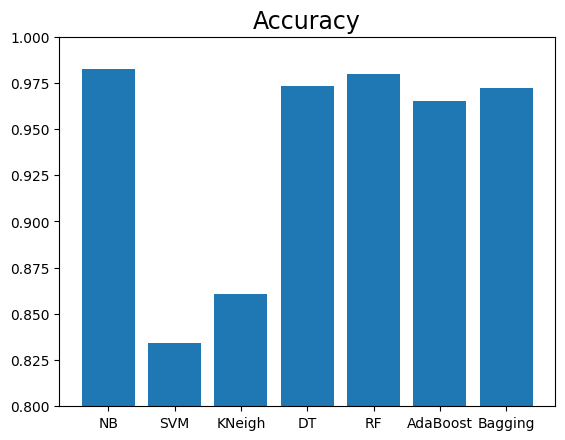

In [ ]:
#Plotting Accuracy of all the models
names = list(dict.keys())
values = list(dict.values())
plt.bar(range(len(dict)), values, tick_label=names)
plt.ylim(0.8,1)
plt.title("Accuracy", fontsize=17)
plt.show()

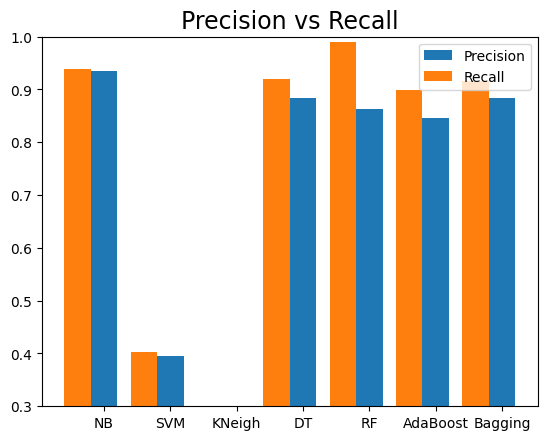

In [ ]:
from matplotlib import pyplot
X = np.arange(len(precision))
ax = plt.subplot(111)
ax.bar(X, precision.values(), width=0.4, align='center')
ax.bar(X-0.4, recall.values(), width=0.4, align='center')
ax.legend(('Precision','Recall'))
plt.xticks(X, precision.keys())
plt.title("Precision vs Recall", fontsize=17)
plt.ylim(0.3,1)
plt.show()

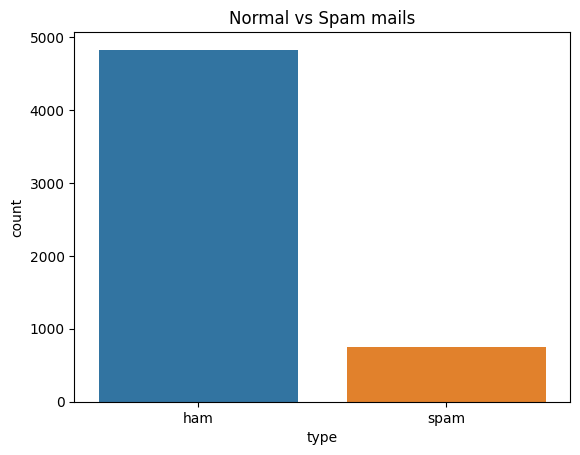

In [ ]:
sns.countplot(data = df, x= df["type"]).set_title("Normal vs Spam mails")
plt.show()

In [ ]:
ham_words = ''
spam_words = ''

In [ ]:
# Creating a corpus of spam messages
for val in df[df['type'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in df[df['type'] == 'ham'].text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [ ]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

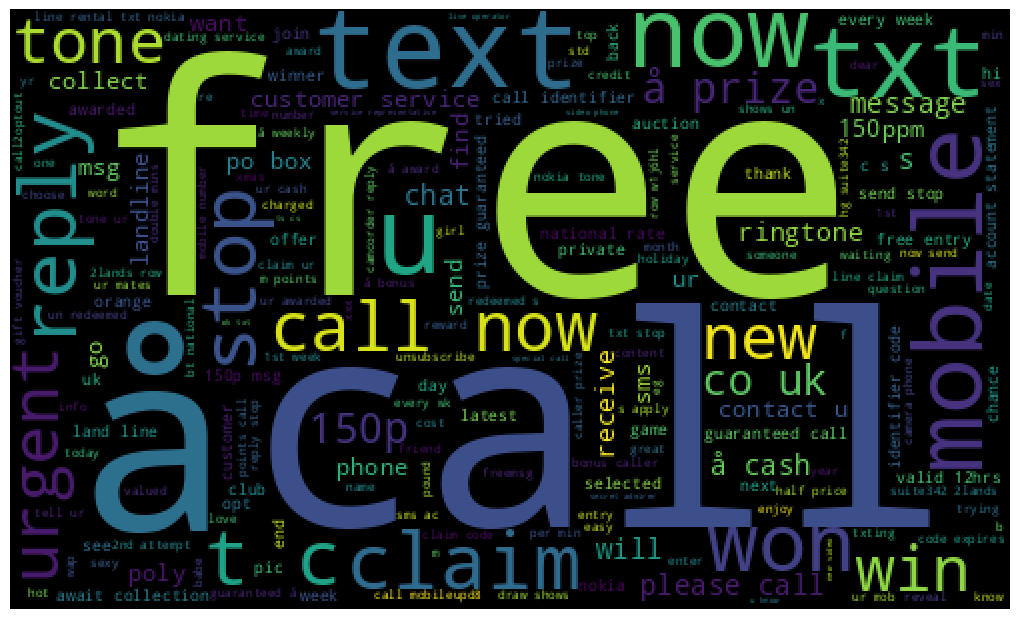

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

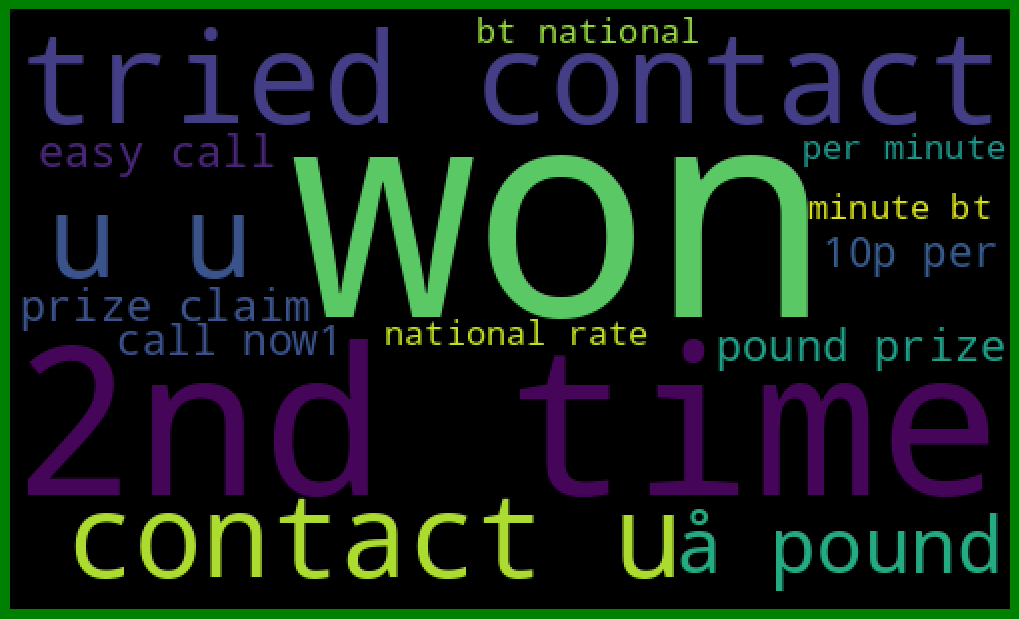

In [ ]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()